In [75]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from Historic_Crypto import HistoricalData
import seaborn as sns
sns.set()

In [182]:
data = HistoricalData('BTC-USD',21600,'2020-06-01-00-00').retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-06-01T00:00:00
Provisional End: 2020-08-15T00:00:00
Data for chunk 1 of 18 extracted
Provisional Start: 2020-08-15T00:00:00
Provisional End: 2020-10-29T00:00:00
Data for chunk 2 of 18 extracted
Provisional Start: 2020-10-29T00:00:00
Provisional End: 2021-01-12T00:00:00
Data for chunk 3 of 18 extracted
Provisional Start: 2021-01-12T00:00:00
Provisional End: 2021-03-28T00:00:00
Data for chunk 4 of 18 extracted
Provisional Start: 2021-03-28T00:00:00
Provisional End: 2021-06-11T00:00:00
Data for chunk 5 of 18 extracted
Provisional Start: 2021-06-11T00:00:00
Provisional End: 2021-08-25T00:00:00
Data for chunk 6 of 18 extracted
Provisional Start: 2021-08-25T00:00:00
Provisional End: 2021-11-08T00:00:00
Data for chunk 7 of 18 ext

In [173]:
data

,low,high,open,close,volume
time,,,,,
2020-06-01 06:00:00,9507.48,9577.70,9531.69,9508.63,863.875400
2020-06-01 12:00:00,9490.00,9613.00,9508.32,9578.58,2717.712449
2020-06-01 18:00:00,9557.26,10428.00,9577.78,10208.96,15919.420102
2020-06-02 00:00:00,10037.60,10237.60,10208.96,10084.29,10264.431236
2020-06-02 06:00:00,10079.39,10148.00,10082.88,10104.84,2103.115456
...,...,...,...,...,...
2024-01-31 18:00:00,42265.77,43741.94,43707.61,42548.08,6536.494378
2024-02-01 00:00:00,41846.04,42657.94,42545.47,42107.77,3009.882819
2024-02-01 06:00:00,42002.49,42290.31,42108.47,42042.98,1063.320423


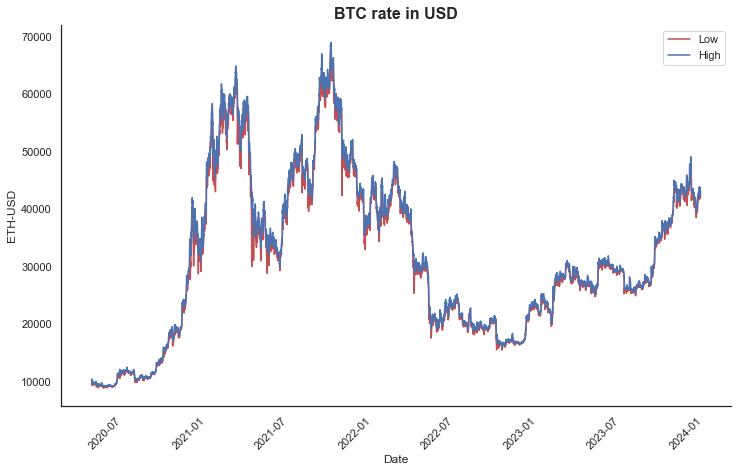

In [174]:
plt.figure(figsize = (12,7))
sns.set_style("white")
plt.plot(data['low'], color = 'r', label='Low')
plt.plot(data['high'],color = 'b', label='High')
sns.despine()
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('ETH-USD')
plt.title('BTC rate in USD', fontsize = 16, fontweight = 'bold')
plt.legend()
plt.show()

# Volatility Analysis

In [175]:
np.std(data)

C:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


low       13834.473763
high      14273.081554
open      14067.436855
close     14065.046876
volume     3779.989313
dtype: float64

In [176]:
years = ['2020','2021','2022','2023']
std_vals = []
for year in years:
    std_vals.append(np.std(data[year+'-01-01':year+'-12-31']['close']))

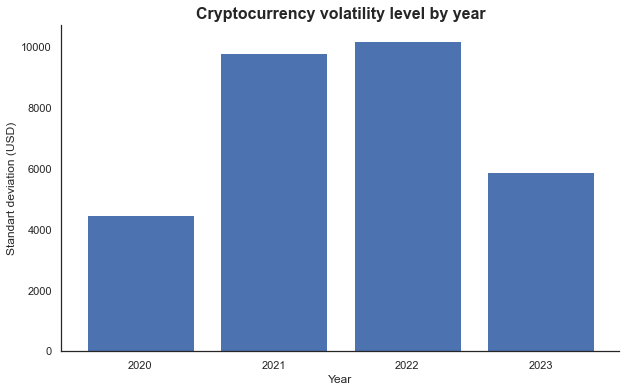

In [177]:
plt.figure(figsize = (10,6))
plt.bar(years, std_vals)
plt.title("Сryptocurrency volatility level by year",fontsize = 16, fontweight = "bold")
plt.xlabel('Year')
plt.ylabel('Standart deviation (USD)')
sns.despine()
plt.show()

In [178]:
date_range = pd.date_range(start=data.index[0], end=data.index[-1], freq='MS')
std_vals_m = [np.std(data['close'][date : date + pd.offsets.MonthBegin(1)]) for date in date_range]
y_m = [date for date in date_range]

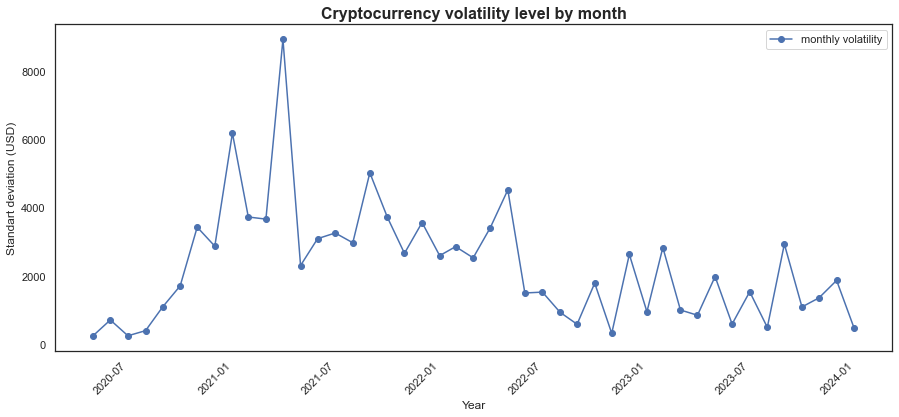

In [179]:
plt.figure(figsize=(15,6))
plt.plot(y_m,std_vals_m,marker='o',label='monthly volatility')
plt.xticks(rotation = 45)
plt.legend()
plt.title("Сryptocurrency volatility level by month",fontsize = 16, fontweight = "bold")
plt.xlabel('Year')
plt.ylabel('Standart deviation (USD)')
plt.show()

According to volatility analysis, cryptocurrency markets experienced periods of high volatility in 2021-2022. Several factors could contributed to the significant rise in cryptocurrency volatility during this period.
 1) Increased Institutional Interest. In 2021, there was a notable increase in institutional interest in cryptocurrencies. More institutional investors and corporations started to allocate funds to Bitcoin and other digital assets, influencing market dynamics.  
 
 2) Market Sentiment and Speculation. Cryptocurrency markets are highly sensitive to market sentiment and speculative trading. News, social media trends, and public perception can drive rapid and unpredictable price changes.  
 
 3) Regulatory Developments: Regulatory announcements and changes can have a significant impact on cryptocurrency prices. Clarity or uncertainty regarding regulatory frameworks in different countries can influence investor confidence and market behavior.  
 
 4) NFT Boom. The rise of Non-Fungible Tokens (NFTs) in 2021 contributed to increased activity in the cryptocurrency space. NFT-related projects and the associated hype led to significant price movements

# Correlation analysis

In [191]:
data_eth = HistoricalData('ETH-USD',21600,'2020-06-01-00-00').retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-06-01T00:00:00
Provisional End: 2020-08-15T00:00:00
Data for chunk 1 of 18 extracted
Provisional Start: 2020-08-15T00:00:00
Provisional End: 2020-10-29T00:00:00
Data for chunk 2 of 18 extracted
Provisional Start: 2020-10-29T00:00:00
Provisional End: 2021-01-12T00:00:00
Data for chunk 3 of 18 extracted
Provisional Start: 2021-01-12T00:00:00
Provisional End: 2021-03-28T00:00:00
Data for chunk 4 of 18 extracted
Provisional Start: 2021-03-28T00:00:00
Provisional End: 2021-06-11T00:00:00
Data for chunk 5 of 18 extracted
Provisional Start: 2021-06-11T00:00:00
Provisional End: 2021-08-25T00:00:00
Data for chunk 6 of 18 extracted
Provisional Start: 2021-08-25T00:00:00
Provisional End: 2021-11-08T00:00:00
Data for chunk 7 of 18 ext

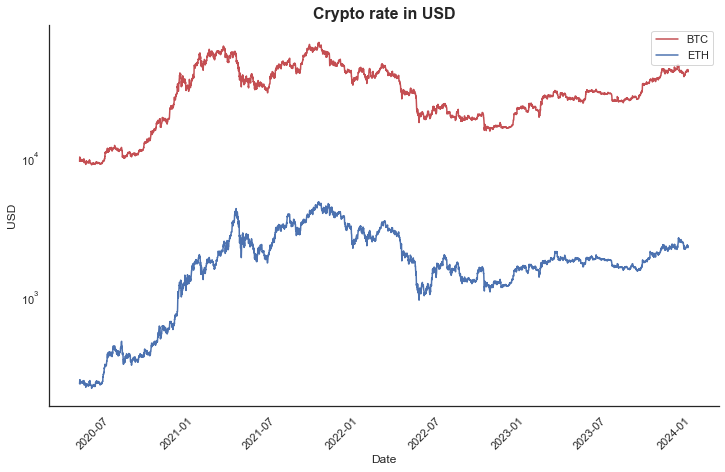

In [192]:
plt.figure(figsize = (12,7))
sns.set_style("white")
plt.plot(data['close'], color = 'r', label='BTC')
plt.plot(data_eth['close'],color = 'b', label='ETH')
sns.despine()
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Crypto rate in USD', fontsize = 16, fontweight = 'bold')
plt.legend()
plt.yscale('log')
plt.show()